<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Dataset Info:
 None

Dataset Description:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Data Types:
 TV           float64
Radio        float64
Newspaper    float64
Sales     

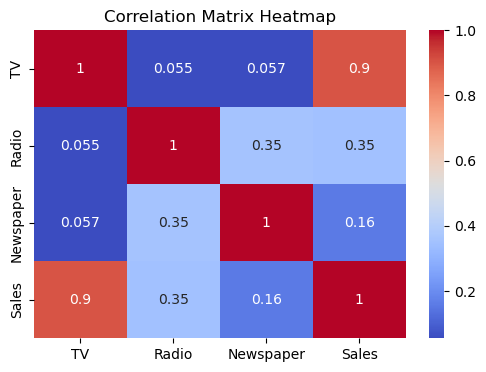

Mulivalue Variables:            TV     Radio  Newspaper
0    0.775786  0.762097   0.605981
1    0.148123  0.792339   0.394019
2    0.055800  0.925403   0.606860
3    0.509976  0.832661   0.511873
4    0.609063  0.217742   0.510994
..        ...       ...        ...
195  0.126818  0.074597   0.118734
196  0.316199  0.098790   0.068602
197  0.596212  0.187500   0.053650
198  0.956713  0.846774   0.579595
199  0.782550  0.173387   0.073879

[200 rows x 3 columns]
Dependent variable: Sales
0      0.807087
1      0.346457
2      0.409449
3      0.586614
4      0.641732
         ...   
195    0.236220
196    0.488189
197    0.519685
198    0.940945
199    0.661417
Name: Sales, Length: 200, dtype: float64
Prediction: [0.6076682  0.74054096 0.87102318 0.30207816 0.79065822 0.43186621
 0.76697616 0.27914766 0.61563042 0.59317223 0.28834508 0.27093443
 0.65383907 0.25462627 0.43486259 0.52486725 0.25701362 0.64168369
 0.37042545 0.74324126 0.75615427 0.43302492 0.36634578 0.81844676
 0.30779374 

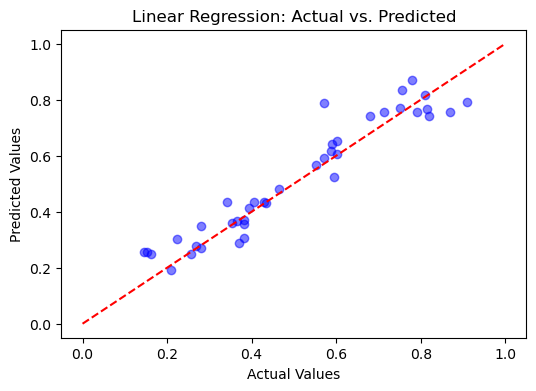

<Figure size 600x400 with 0 Axes>

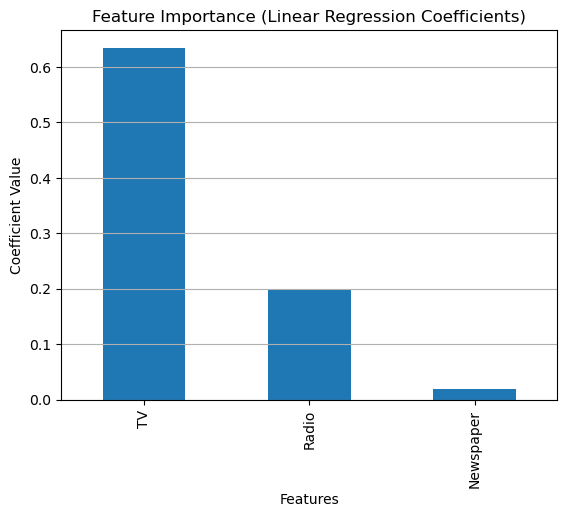

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Load dataset
file_path = "~/Downloads/advertising.csv"  # Update to the avertising data set with 3 variables affecting sales
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())
print("\nData Types:\n", df.dtypes)

# Preprocessing Section and handle missing values
print("\nChecking for missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Removing rows with missing values (Not needed here)

# Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Generate Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") #Small for a small dataset with 2 variables
plt.title("Correlation Matrix Heatmap")
plt.show()



# Normalize Data with the minmax scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split Data
X = df_scaled.iloc[:, :-1]  # Independent variables (TV, Radio, Newspaper) Everything except the last column
y = df_scaled.iloc[:, -1]   # Dependent variable (Sales) Only last column
print("Mulivalue Variables:",X)
print("Dependent variable:",y.name)
print(y)

# Conduct and Train Linear Regression Model
model = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20 percent in training here
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
print("Prediction:", y_pred)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
cross_val = cross_val_score(model, X, y, cv=5).mean()

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Explained Variance Score:", explained_var)
print("Cross-Validation Score:", cross_val)


# Plotting graphs
## scatter plot for Predicting Values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()


## Bar Chart to illuistrate the importance a variable is to sales by coefficenient value
### Just like the heatmap, TV is what is the most effective in advertising
plt.figure(figsize=(6,4))
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', legend=False)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis="y")
plt.show()
